# Introduction
Inspired by predicting sales of things dependent of multivariate observations (eg day of week, holidays) and so on

## Prepare data
Before using deflate train and test data that has been downloaded before (kaggle competitions download -c rossmann-store-sales).

```
unzip -d ./input/rossmann-store-sales.zip ./input/
```

## Further literature
- [kaggle competition](https://www.kaggle.com/c/rossmann-store-sales)
- https://www.mdpi.com/2306-5729/4/1/15
- http://cs229.stanford.edu/proj2015/205_report.pdf


# Preprocessing
Feature engineering, create categorial columns

In [4]:
import pandas as pd
from pandas import DataFrame

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df_train: DataFrame = pd.read_csv('./input/train.csv', parse_dates=['Date'], dtype={'StateHoliday': str, 'Open': bool, 'Promo': bool, 'SchoolHoliday': bool})

# FEATURE ENGINEERING
## StateHoliday -> categorial
df_train['StateHoliday'] = df_train['StateHoliday'].astype('category')

## StateHoliday -> categorial
df_train['DayOfWeek'] = df_train['DayOfWeek'].astype('category')

df_train.info()
df_train.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  category      
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  bool          
 6   Promo          1017209 non-null  bool          
 7   StateHoliday   1017209 non-null  category      
 8   SchoolHoliday  1017209 non-null  bool          
dtypes: bool(3), category(2), datetime64[ns](1), int64(3)
memory usage: 35.9 MB


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,True,True,0,True
1,2,5,2015-07-31,6064,625,True,True,0,True
2,3,5,2015-07-31,8314,821,True,True,0,True
3,4,5,2015-07-31,13995,1498,True,True,0,True
4,5,5,2015-07-31,4822,559,True,True,0,True


# Per store analysis
In the following analysis per ONE store id is done and data prepared to be able to forecast sales for one store

## Seasonality
A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months, every 1 week, every 4 months, and so on.
Let us check if our time series has some seasonality element to it.

If yes, we can forecast entire weeks.

In [5]:
from pandas.plotting import lag_plot
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped by Store
df_train_stores = df_train.groupby(by=['Store'])
#df_train_stores.Date.max()
#df_train_stores.Date.min()
df_train_store_1 = df_train_stores.get_group(1).set_index('Date')
sales_zero_idx = df_train_store_1[df_train_store_1['Sales'] == 0].index
df_train_store_1 = df_train_store_1.drop(sales_zero_idx)
#df_train_store_1['2015-01-01':'2015-02-01'].tail(10)
#df_train_store_1.head(10)

def avg_sales_per_period(df: DataFrame) -> pd.Series:
    df_copy = df.copy()
    s_tmp: pd.Series = df['Sales'] / df['Open']
    df_copy['Sales_per_open_days_avg'] = s_tmp.astype('int')
    return df_copy


# Daily lags -> Forecast Daily sales

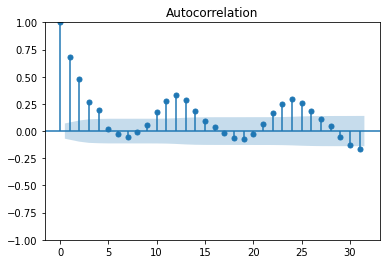

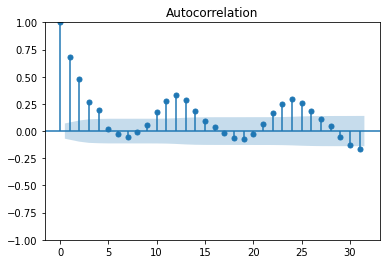

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

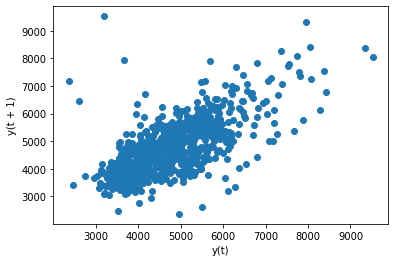

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa import stattools
import matplotlib.pyplot as plt

plot_acf(df_train_store_1['Sales'], lags=31)
plt.show()

lag_plot(series=df_train_store_1['Sales'], lag=1)
plt.show()